<img src="https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Módulo 10** | Exercício 1

Aluno [Lays Félix](https://www.linkedin.com/in/laysfelixbusiness)<br>
Data: 16 de fevereiro de 2024

---

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

### Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Carregando o dataframe <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
previsao_de_renda = pd.read_csv('previsao_de_renda.csv')
previsao_de_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


### Tratando os dados <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
previsao_de_renda.drop(columns=['Unnamed: 0', 'index'], inplace=True)
previsao_de_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12466 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  mau                    15000 non-null  bool   
 13  renda                  15000 non-null  float64
dtypes: bool(3), float64(3), int64(2), object(6)
memory usa

In [4]:
# eliminando os dados duplicados e renumerando o index
previsao_de_renda.drop_duplicates(inplace=True)
previsao_de_renda.reset_index(inplace=True, drop=True)
previsao_de_renda

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14542,2016-03-01,M,True,True,0,Assalariado,Secundário,Casado,Casa,30,9.800000,2.0,False,3018.59
14543,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14544,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14545,2016-03-01,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [5]:
# Matriz de correlação

previsao_de_renda.corr(numeric_only=14)

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
posse_de_veiculo,1.000000,-0.014080,0.110330,-0.159355,-0.086039,0.157866,-0.017475,0.061308
posse_de_imovel,-0.014080,1.000000,-0.002239,0.123009,0.000084,-0.006123,-0.021319,0.029957
qtd_filhos,0.110330,-0.002239,1.000000,-0.368619,-0.074090,0.895710,0.010093,0.009206
idade,-0.159355,0.123009,-0.368619,1.000000,0.322335,-0.342854,-0.008264,0.042837
tempo_emprego,-0.086039,0.000084,-0.074090,0.322335,1.000000,-0.064750,-0.047191,0.394918
qt_pessoas_residencia,0.157866,-0.006123,0.895710,-0.342854,-0.064750,1.000000,-0.000939,0.020118
mau,-0.017475,-0.021319,0.010093,-0.008264,-0.047191,-0.000939,1.000000,-0.011331
renda,0.061308,0.029957,0.009206,0.042837,0.394918,0.020118,-0.011331,1.000000


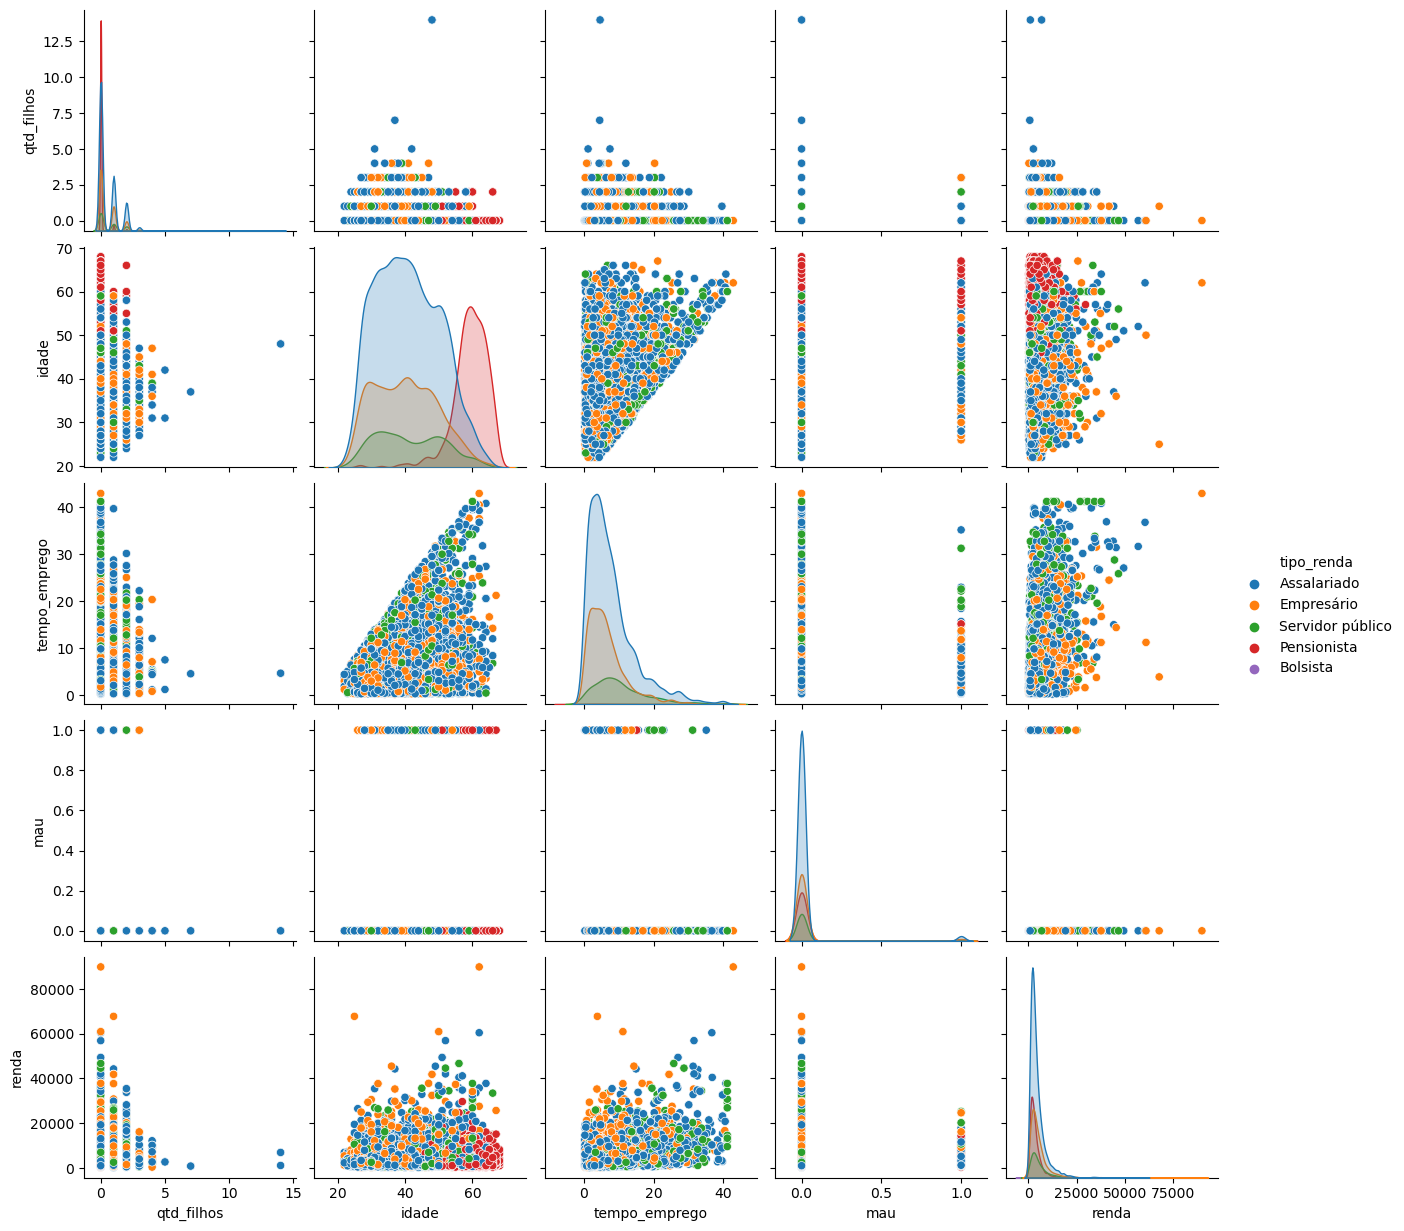

In [6]:
# Matriz de dispersão

sns.pairplot(data=previsao_de_renda, 
             hue='tipo_renda', 
             vars=['qtd_filhos', 
                   'idade', 
                   'tempo_emprego', 
                   'mau', 
                   'renda'])

plt.show()

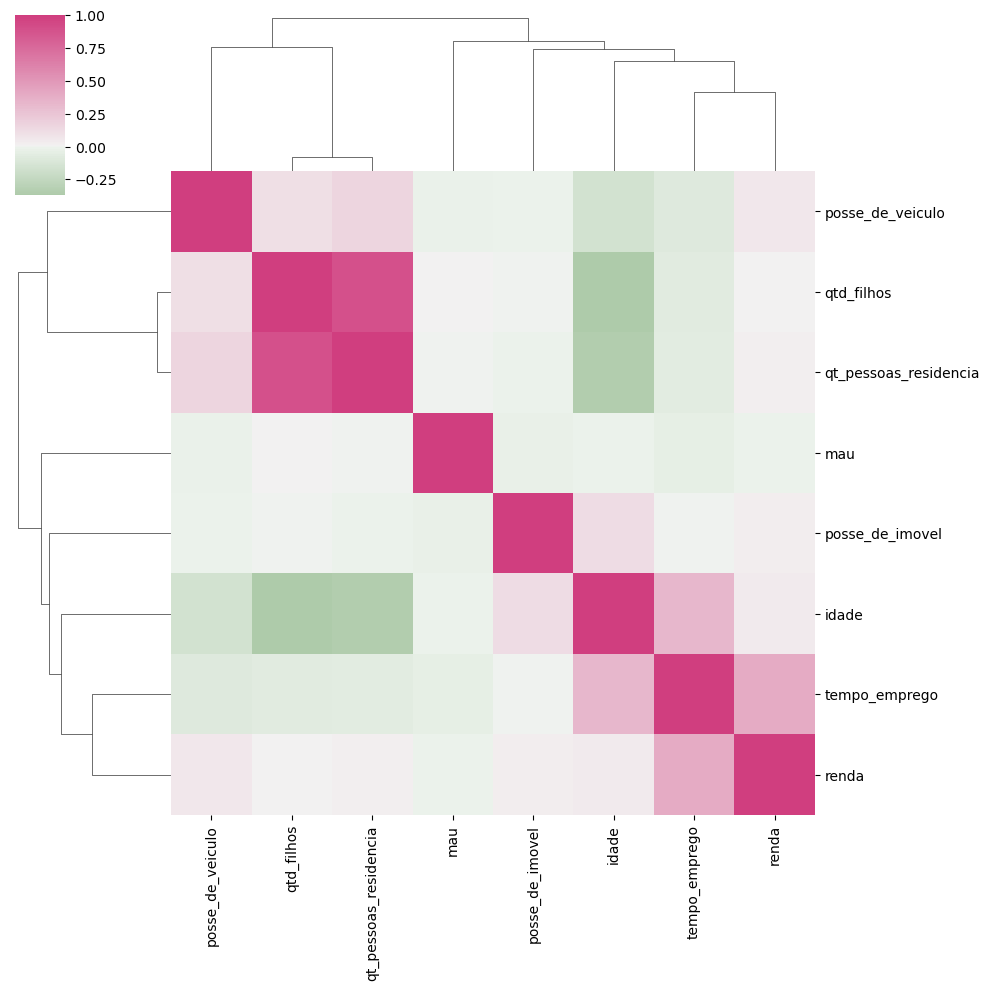

In [7]:
# Clustermap

cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 1, center = 'light')

sns.clustermap(previsao_de_renda.corr(numeric_only=14), figsize=(10, 10), center = 0, cmap=cmap)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

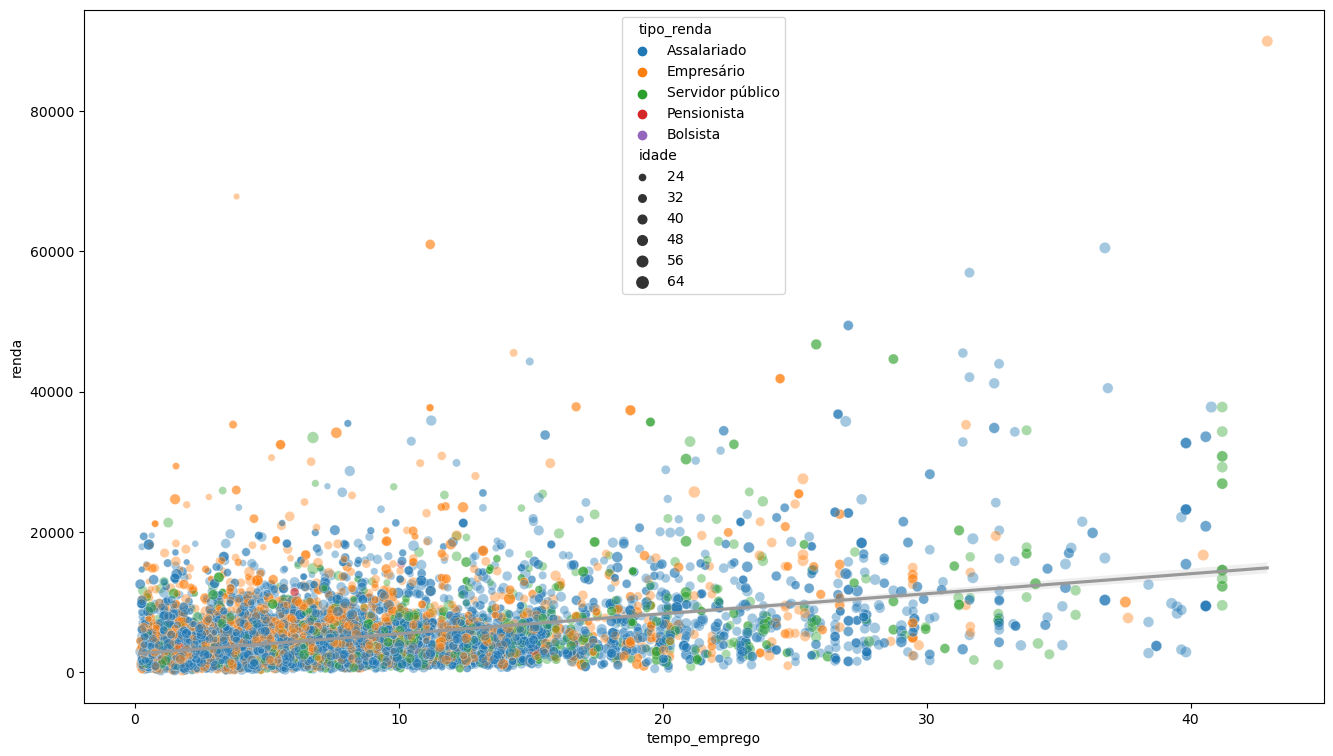

In [8]:
plt.figure(figsize=(16,9))

sns.scatterplot(x='tempo_emprego',  # <- 1ª
                y='renda', 
                hue='tipo_renda', 
                size='idade',  # <- 2ª
                data=previsao_de_renda,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='tempo_emprego', y='renda', data=previsao_de_renda, scatter=False, color='.6')

plt.show()

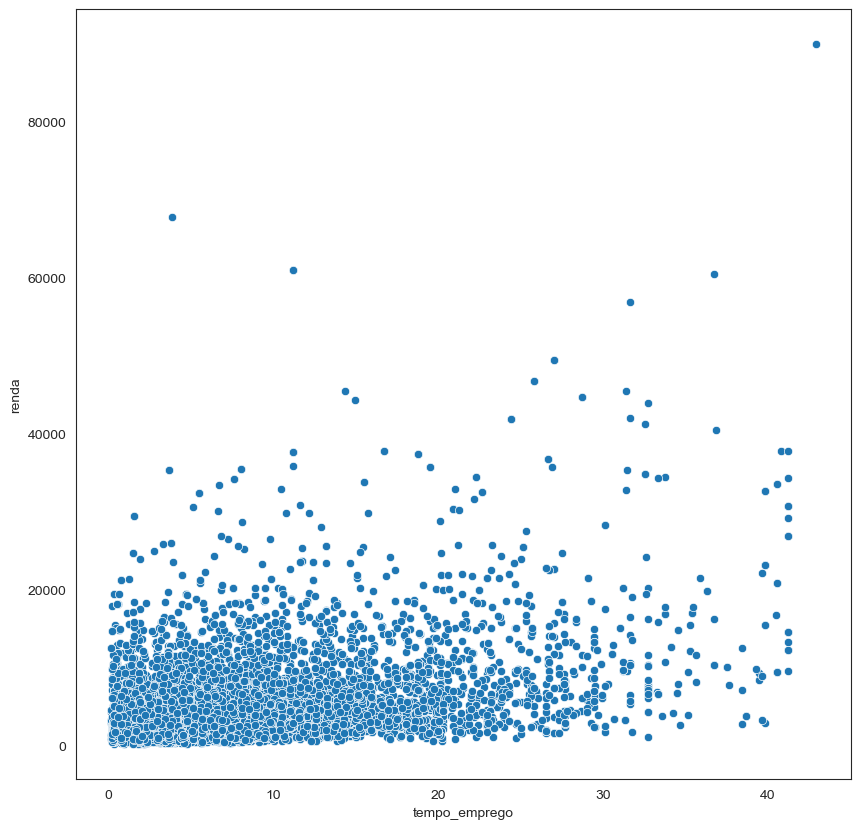

In [9]:
sns.set_style("white")
plt.figure(figsize=(10, 10))

# Gráfico de Dispersão
g = sns.scatterplot(x="tempo_emprego", y="renda", 
                    data=previsao_de_renda)
plt.show()

3) Na sua aopinião, há outliers na variável renda?

Sim, a renda acima de R$ 80.000 demonstra cliente com experiência acima dos demais, já que possui mais de 40 anos de emprego e o salário maior.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

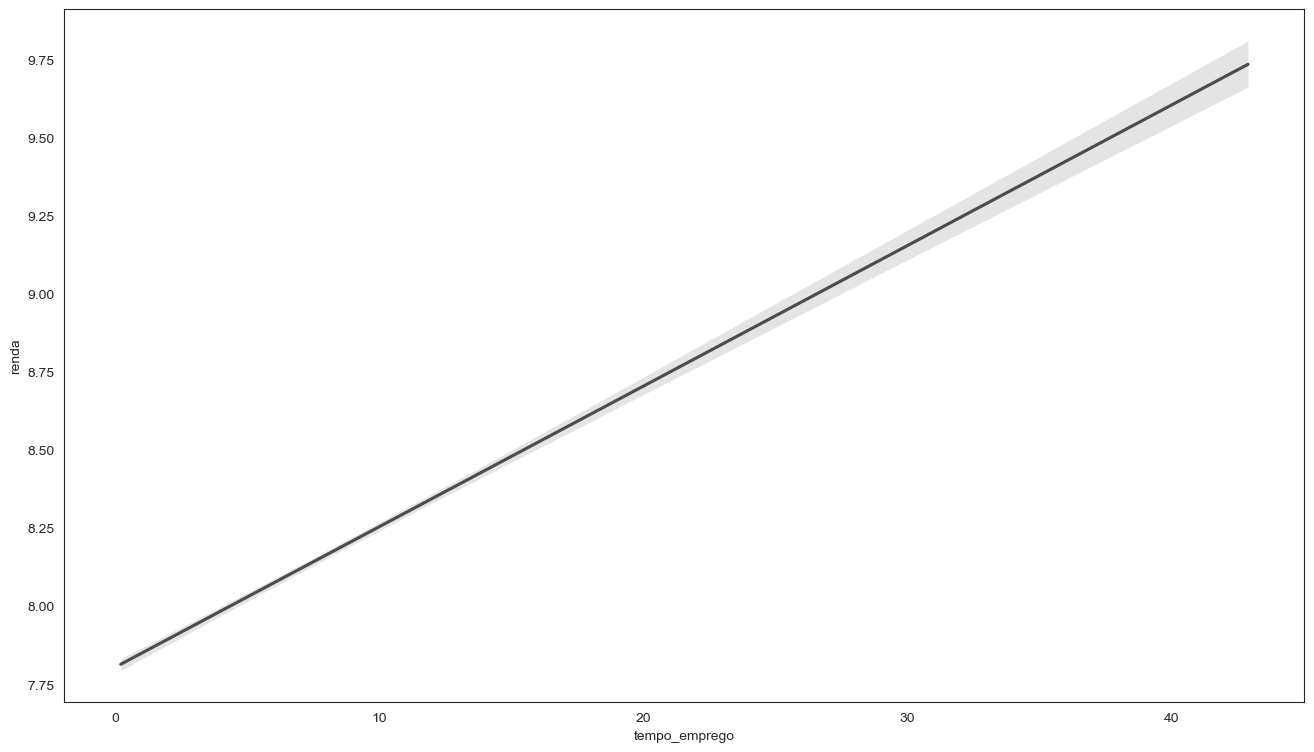

In [11]:
df_log = previsao_de_renda.copy()
df_log['renda'] = np.log(df_log['renda'])

plt.figure(figsize=(16,9))


# Linha de tendência:
sns.regplot(x='tempo_emprego', 
            y='renda', 
            data=df_log, 
            scatter=False, 
            color='.3')

plt.show()

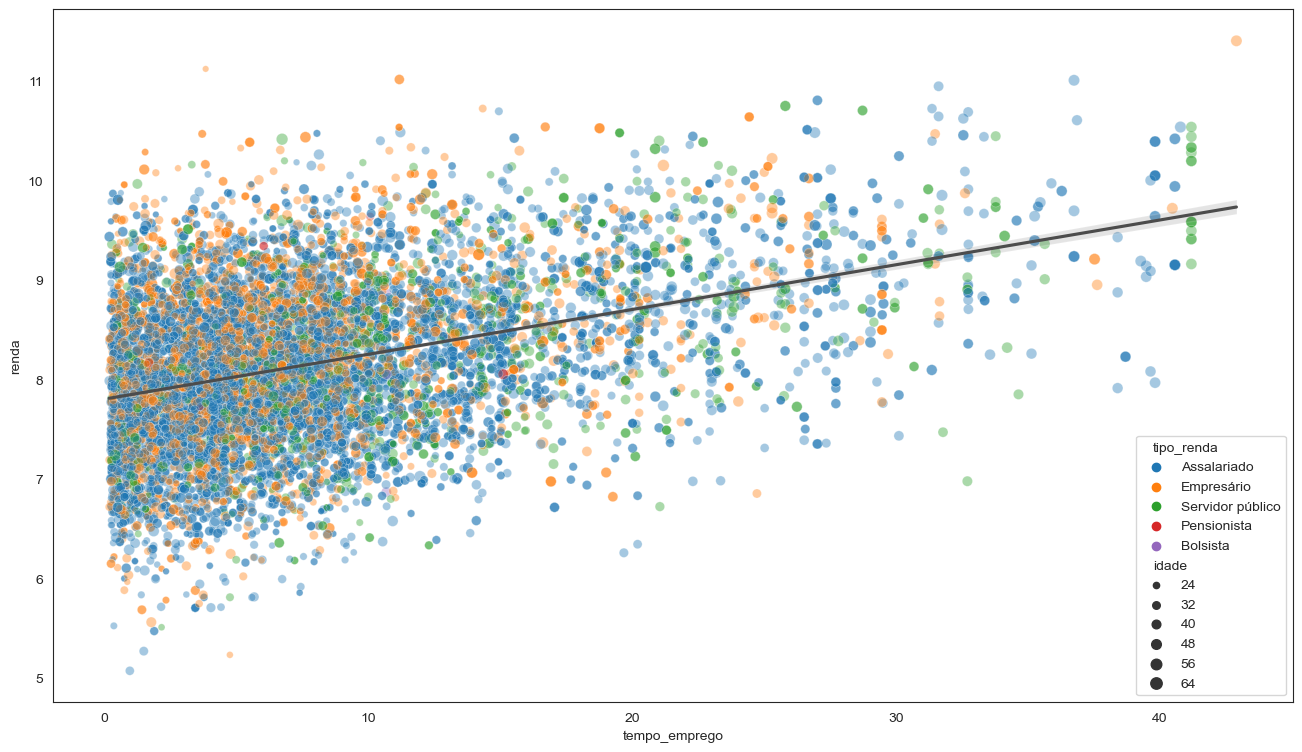

In [12]:
df_log = previsao_de_renda.copy()
df_log['renda'] = np.log(df_log['renda'])

plt.figure(figsize=(16,9))

sns.scatterplot(x='tempo_emprego',  # <- 1ª
                y='renda', 
                hue='tipo_renda', 
                size='idade',  # <- 2ª
                data=df_log,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='tempo_emprego', 
            y='renda', 
            data=df_log, 
            scatter=False, 
            color='.3')

plt.show()

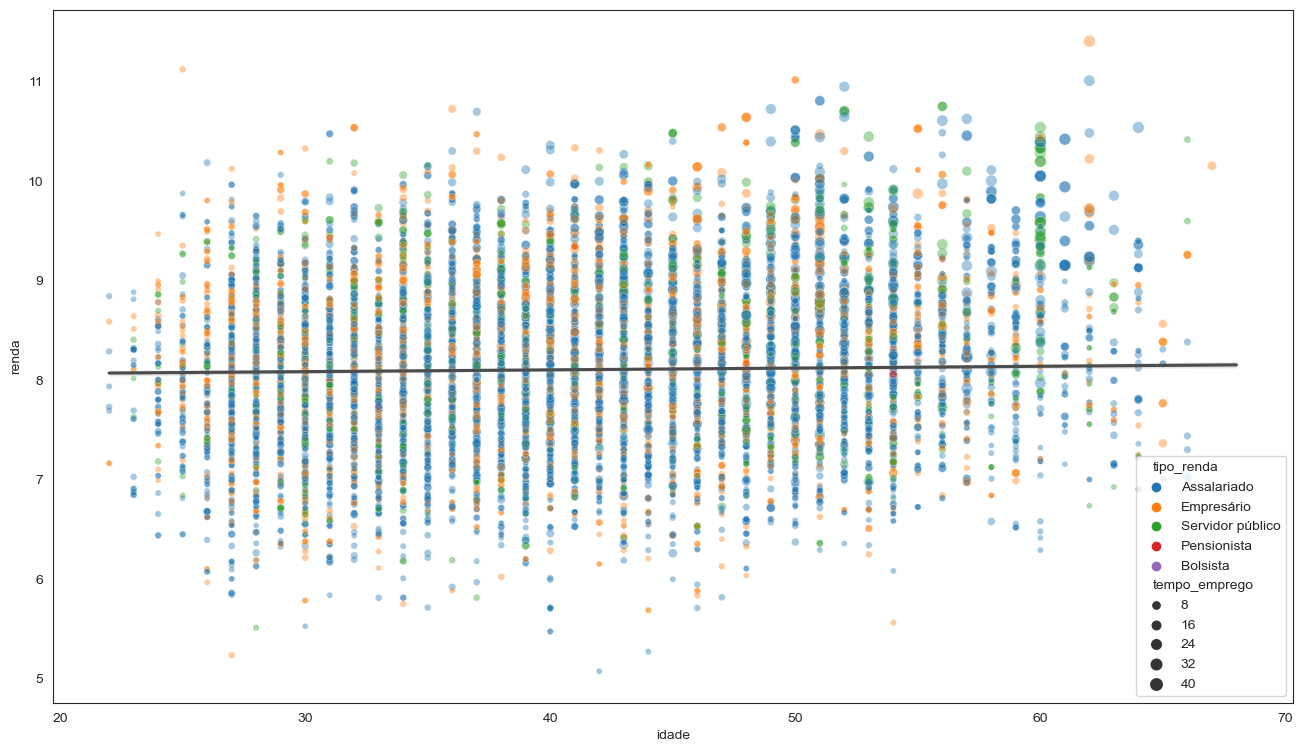

In [13]:
df_log = previsao_de_renda.copy()
df_log['renda'] = np.log(df_log['renda'])

plt.figure(figsize=(16,9))

sns.scatterplot(x='idade',  # <- 1ª
                y='renda', 
                hue='tipo_renda', 
                size='tempo_emprego',  # <- 2ª
                data=df_log,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='idade', 
            y='renda', 
            data=df_log, 
            scatter=False, 
            color='.3')

plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Sim. Comparando os gráficos gerados no comando 8 e 12, no gráfico 12 com a aplicação do LOG exibe os dados mais consolidados.

In [14]:
# Diferença após aplicação do LOG:

pd.concat(objs=[previsao_de_renda.corr(numeric_only=14).tail(1), 
                df_log.corr(numeric_only=14).tail(1)], 
          axis=0
         ).reset_index(drop=True).rename(index={0:'renda', 
                                                1:'renda_log'})

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
renda,0.061308,0.029957,0.009206,0.042837,0.394918,0.020118,-0.011331,1.0
renda_log,0.088684,0.045165,0.022322,0.025143,0.380039,0.034614,-0.014009,1.0


In [66]:
# O que tem de errado nesse comando? Já que previsao_de_renda é o nome do meu dataframe

previsao_de_renda = sns.load_dataset("previsao_de_renda")
sns.pairplot(
    previsao_de_renda,
    hue='tipo_renda')

ValueError: 'previsao_de_renda' is not one of the example datasets.